In [1]:
# https://www.kaggle.com/gagandeep16/car-sales
#https://www.kaggle.com/adityakadiwal/water-potability
import pandas as pd
import numpy as np
import datetime

import warnings

warnings.filterwarnings(action='ignore')

### Load data

In [2]:
# import pandas pandas
import pandas as pd

# load dataset
df = pd.read_csv('Car_sales.csv')

# describe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [3]:
# dimensions of dataset
df.shape

(157, 16)

### Preprocess data

In [4]:
# remove all rows with null values
df = df.dropna()

In [5]:
# extract day, month, and year
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'])
df['Year'] = df['Latest_Launch'].dt.year
df['Month'] = df['Latest_Launch'].dt.month
df['Day'] = df['Latest_Launch'].dt.day
df = df.drop('Latest_Launch', axis=1)

In [6]:
# preview
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Year,Month,Day
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012,2,2
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011,6,3
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011,3,10
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011,10,8
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,2011,8,9


### Identify variables with multicolinearity

In [7]:
# compute the correlation coefficient for every pair of features
df.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Year,Month,Day
Sales_in_thousands,1.000000,-0.275426,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066927,-0.175562,0.096990,0.071364,-0.027465
__year_resale_value,-0.275426,1.000000,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.398459,0.829511,-0.029191,-0.081414,-0.070035
Price_in_thousands,-0.251705,0.954757,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479539,0.905002,-0.025258,-0.057332,-0.038064
Engine_size,0.038111,0.527187,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724871,0.841005,0.011137,0.003352,-0.042170
Horsepower,-0.152538,0.773110,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595844,0.994071,0.032013,-0.007721,-0.082166
Wheelbase,0.406839,-0.053685,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470455,0.200228,0.019070,-0.024318,0.009698
Width,0.177802,0.178128,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599604,0.478889,0.022790,0.066632,-0.015686
Length,0.272336,0.025390,0.182592,0.537343,0.400968,0.853669,0.743226,1.000000,0.684305,0.562504,-0.465682,0.366831,0.048820,0.024945,0.032482
Curb_weight,0.067184,0.363274,0.511400,0.742831,0.598603,0.675609,0.735957,0.684305,1.000000,0.847994,-0.818819,0.597586,-0.053328,-0.044127,-0.009427
Fuel_capacity,0.138045,0.324796,0.406496,0.616862,0.479790,0.658654,0.672191,0.562504,0.847994,1.000000,-0.808506,0.478484,0.067297,-0.101816,-0.042346


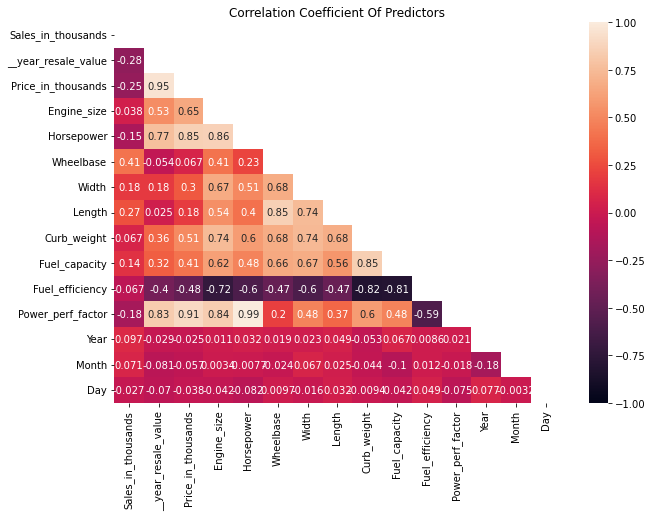

In [8]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# plot heatmap
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [9]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [10]:
# features to consider removing
considered_features = ['Fuel_efficiency', 'Power_perf_factor', 'Engine_size', 'Horsepower', 'Fuel_capacity', 'Curb_weight']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
3,Horsepower,111.471081
1,Power_perf_factor,97.177100
2,Engine_size,6.721330
5,Curb_weight,5.353387
4,Fuel_capacity,4.282718
0,Fuel_efficiency,4.004185


In [11]:
# compute vif values after removing a feature
considered_features.remove('Horsepower')
compute_vif(considered_features).sort_values(by='VIF', ascending=False)

,Variable,VIF
2,Engine_size,5.208420
4,Curb_weight,5.200252
3,Fuel_capacity,4.281471
0,Fuel_efficiency,4.001535
1,Power_perf_factor,3.447764


In [12]:
# compute vif values after removing a feature
considered_features.remove('Engine_size')
compute_vif(considered_features)

,Variable,VIF
0,Fuel_efficiency,3.787366
1,Power_perf_factor,1.675473
2,Fuel_capacity,4.255820
3,Curb_weight,4.769113


### Train models with and without features having multicolinearity

In [13]:
# load libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


# creating datasets with and without feature removal 

# find all categorical features
cat_var = [var for var in df.columns if df[var].dtypes=='object']

# one hot-encode all categorical features 
ohe = pd.get_dummies(df[cat_var])

#  dataframe with removed features
df_fs = df.drop(['Horsepower', 'Engine_size'], axis = 1)
df_fs = pd.concat([df_fs, ohe], axis=1)
df_fs = df_fs.drop(cat_var, axis=1)

# dataframe without removed features
df = pd.concat([df, ohe], axis=1)
df = df.drop(cat_var, axis=1)

# train test split for both datasets 

X = df.drop('Price_in_thousands', axis=1)
y = df['Price_in_thousands']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_fs = df_fs.drop('Price_in_thousands', axis=1)
y_fs = df_fs['Price_in_thousands']

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.25, random_state=42)

# Standardization for both datasets 

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

mms_fs = MinMaxScaler()
X_train_fs = mms_fs.fit_transform(X_train_fs)
X_test_fs = mms_fs.transform(X_test_fs)

# making predictions with models for both datasets

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_fs = LinearRegression()
lr_fs.fit(X_train_fs, y_train_fs)
y_pred_fs = lr_fs.predict(X_test_fs)

In [14]:
from sklearn.metrics import mean_squared_error

# compute mean_squared errors for both models
mse = mean_squared_error(y_test, y_pred)
mse_fs = mean_squared_error(y_test_fs, y_pred_fs)

print('Mean squared error without feature selection: {}'.format(np.round(mse,2)))
print('Mean squared error with feature selection: {}'.format(np.round(mse_fs,2)))

Mean squared error without feature selection: 6.74
Mean squared error with feature selection: 6.78


### Compare feature importance with and without feature selection

In [15]:
# find coefficients of each feature in the data without feature selection
importance = lr.coef_
dict_importance = {X.columns[i]:importance[i] for i in range(len(X.columns))}

# find coefficients of each feature in the data with feature selection
importance_fs = lr_fs.coef_
dict_importance_fs = {X_fs.columns[i]:importance_fs[i] for i in range(len(X_fs.columns))}

# features to assess
features = ['__year_resale_value',
        'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency']
feature_importance = [dict_importance[feature] for feature in features]
feature_importance_fs = [dict_importance_fs[feature] for feature in features]

# tabulate the coefficient values of each feature with and without feature selection
importance = pd.DataFrame()
importance['Feature'] = features
importance['Feature Importance (Without Feature Selection)'] = feature_importance
importance['Feature Importance (With Feature Selection)'] = feature_importance_fs
importance

,Feature,Feature Importance (Without Feature Selection),Feature Importance (With Feature Selection)
0,__year_resale_value,23.861732,25.140311
1,Wheelbase,-2.134474,-1.664919
2,Width,-1.759031,-0.926409
3,Length,-3.004377,-2.648463
4,Curb_weight,7.774152,8.677267
5,Fuel_capacity,2.474615,2.743676
6,Fuel_efficiency,-2.337159,-4.387904
